In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

fts_sel_l = pd.read_csv('../Output/Submission-Long/features/Features_Selected.csv')
fts_sel_d = pd.read_csv('../Output/Submission-Delta/features/Features_Selected.csv')

fts_vals = pd.read_csv('../Output/Submission-Long/features/Features_Rescaled.csv')
fts_vals['Selected'] = 0
fts_vals.loc[fts_vals['Feature'].isin(fts_sel_l['Feature']), 'Selected'] = 'L'
fts_vals.loc[fts_vals['Feature'].isin(fts_sel_d['Feature']), 'Selected'] = 'D'


fts_vals = fts_vals[fts_vals['Selected'] != 0]
# for firstorder median change to B
fts_vals.loc[fts_vals['Feature'] == 'firstorder_Median', 'Selected'] = 'B'
# samwe wirh glcm_jointenergy
fts_vals.loc[fts_vals['Feature'] == 'glcm_JointEnergy', 'Selected'] = 'B'


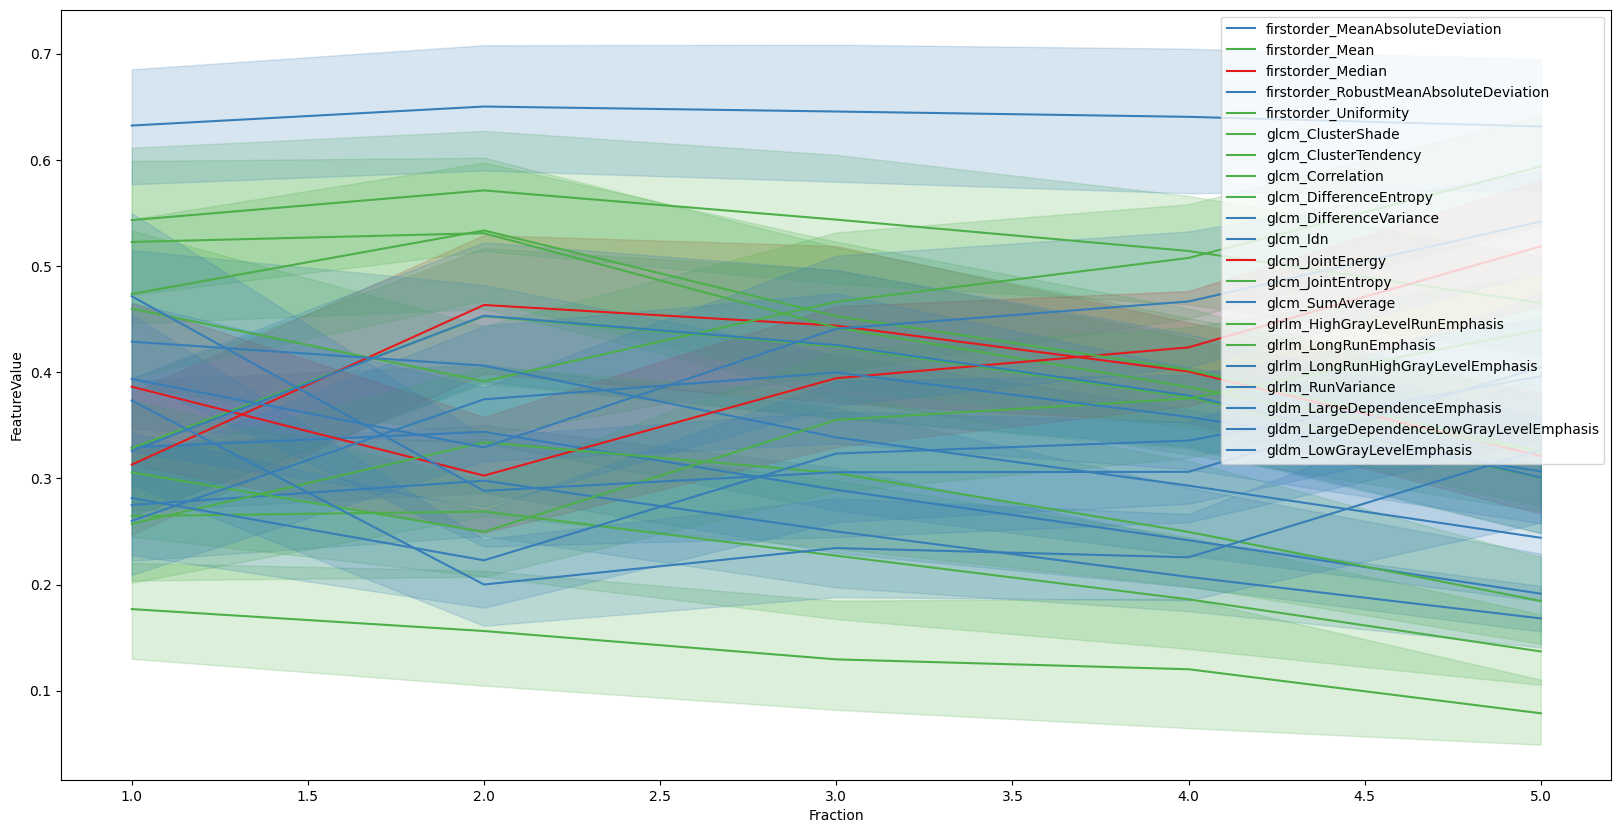

In [2]:
plt.figure(figsize=(20, 10))
colors = sns.color_palette("Set1", 3)

# map selected values to colors
sel_labels = fts_vals['Selected'].unique()
sel_labels.sort()
sel_label = dict(zip(sel_labels, range(len(sel_labels))))

for ft in fts_vals['Feature'].unique():
    line_color = colors[int(sel_label[fts_vals[fts_vals['Feature'] == ft]['Selected'].values[0]])]
    sns.lineplot(x='Fraction', y='FeatureValue', data=fts_vals[fts_vals['Feature'] == ft], label=ft, color=line_color)
    



c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


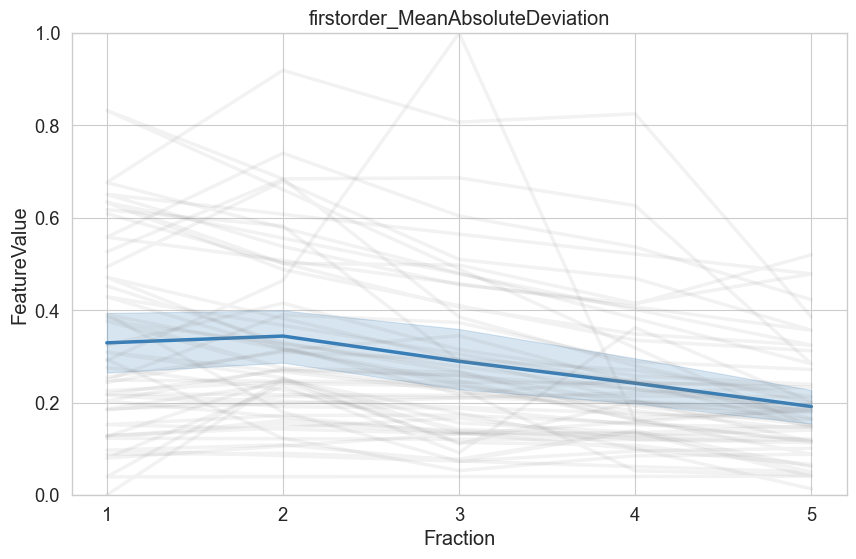

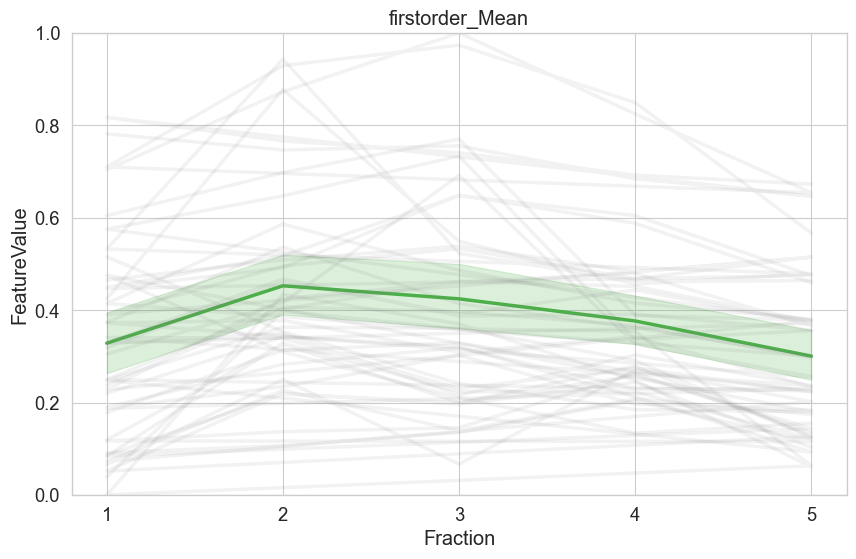

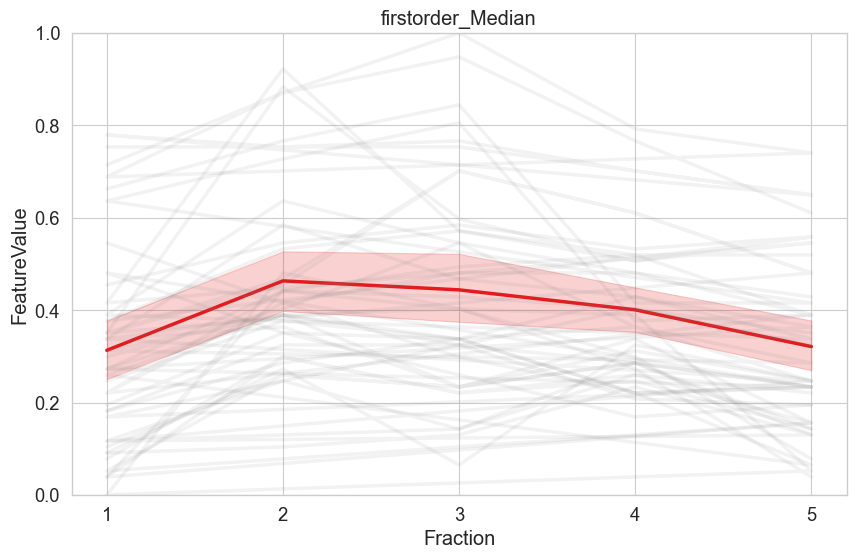

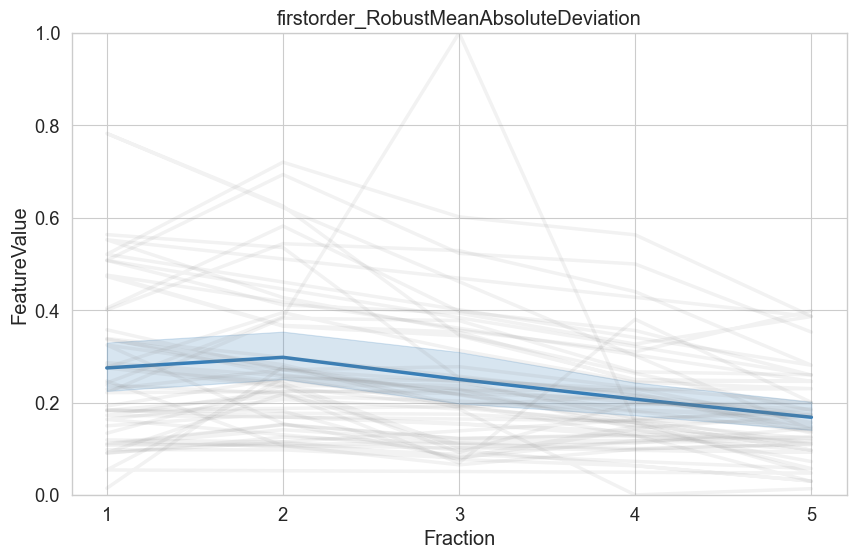

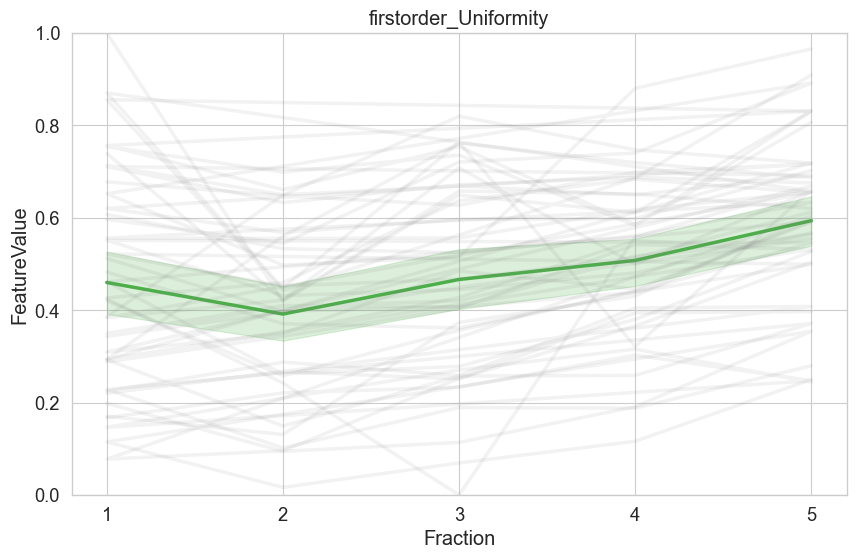

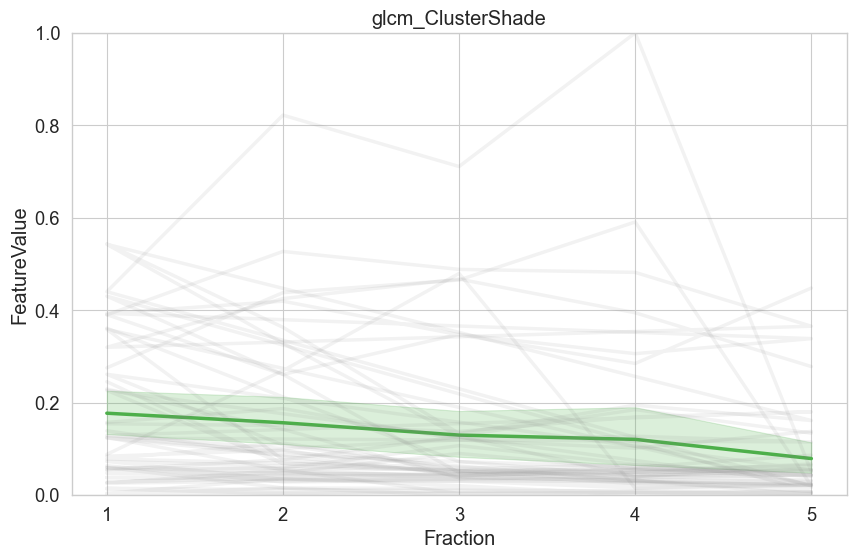

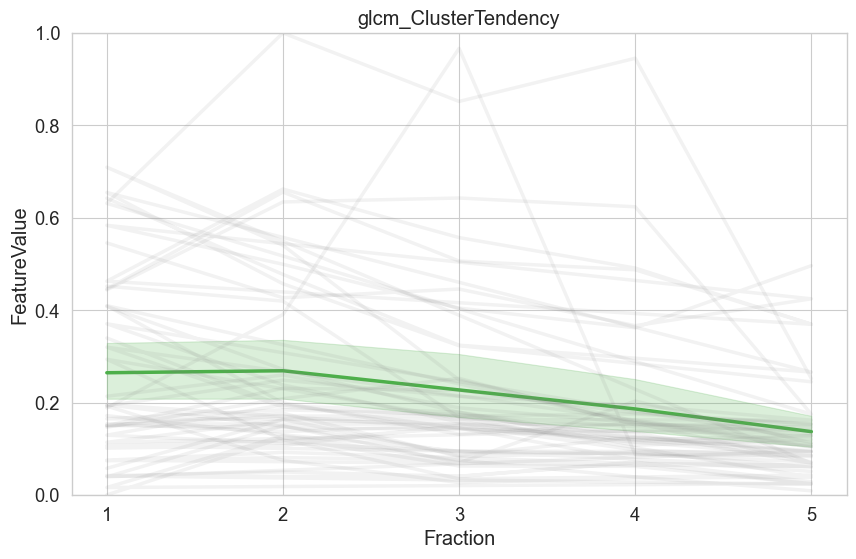

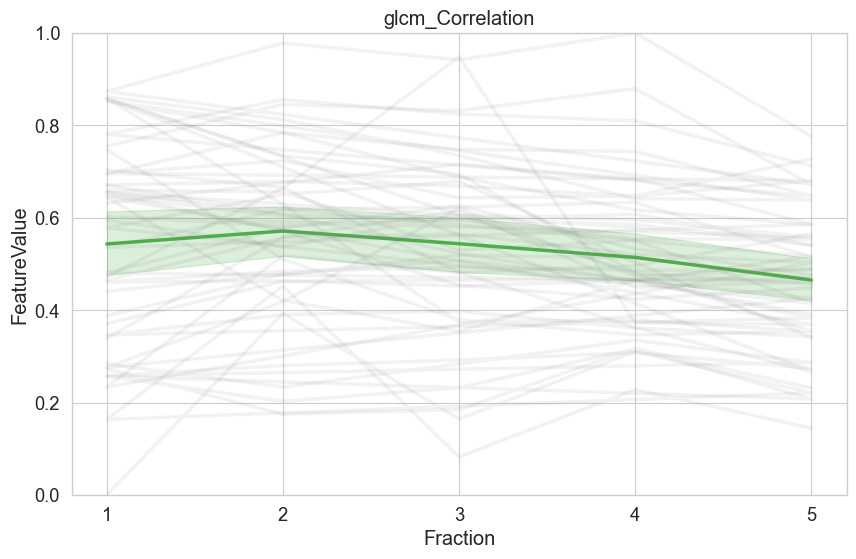

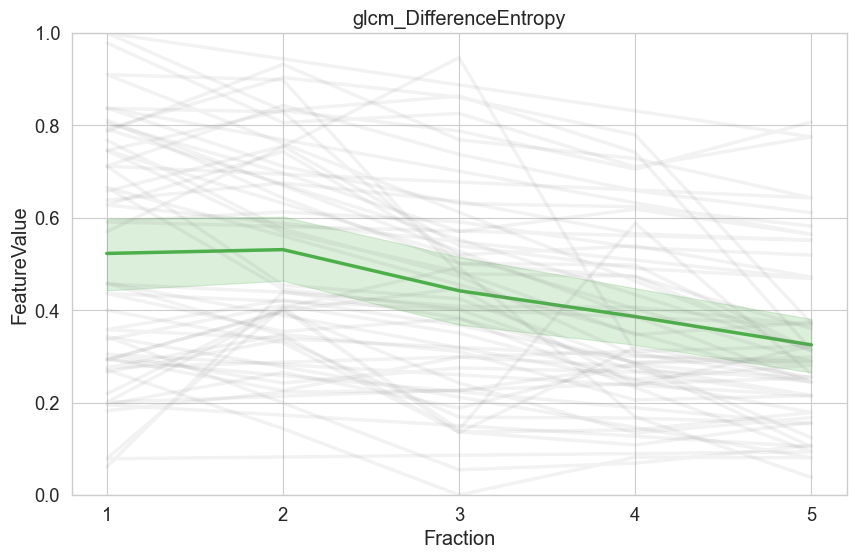

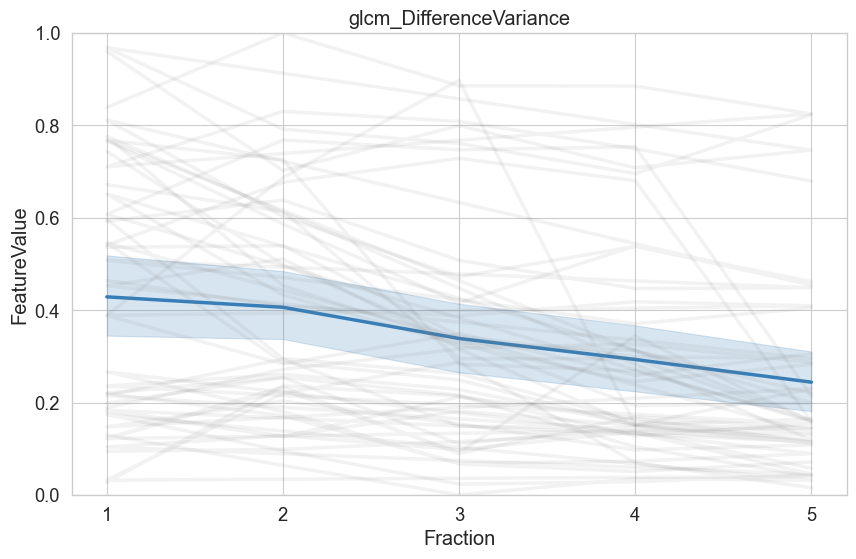

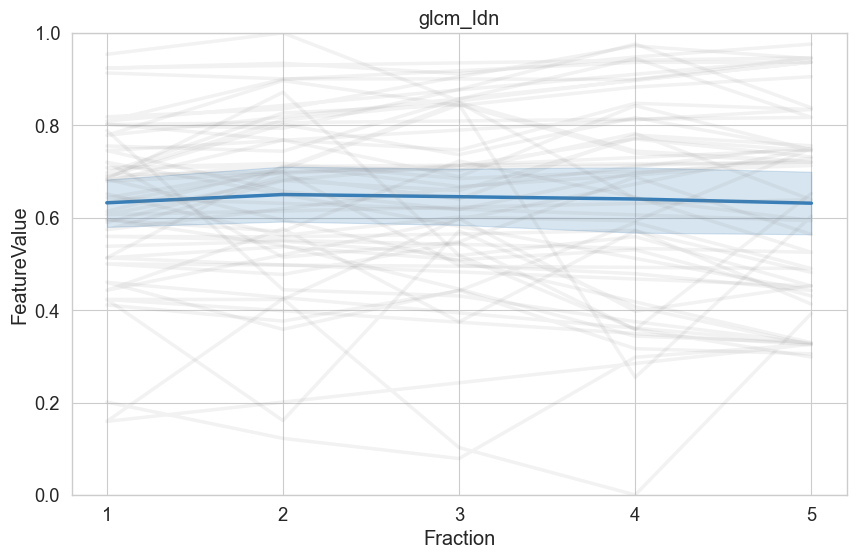

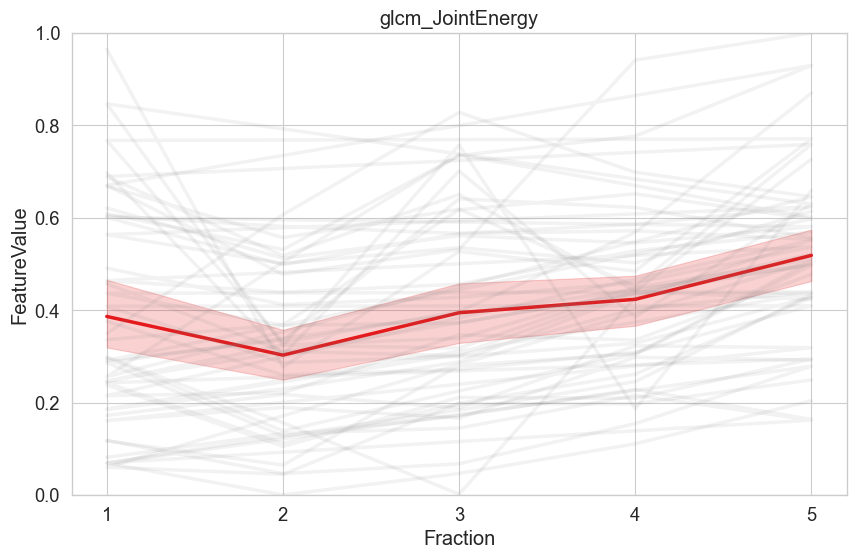

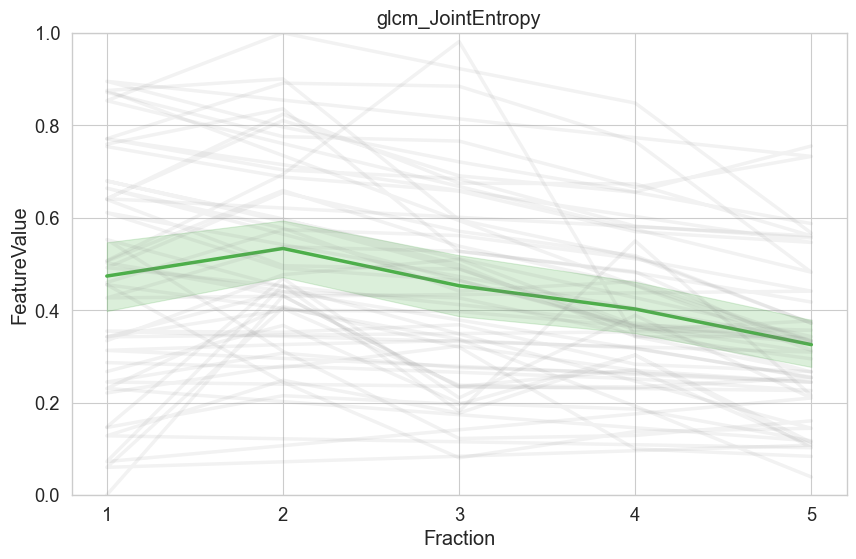

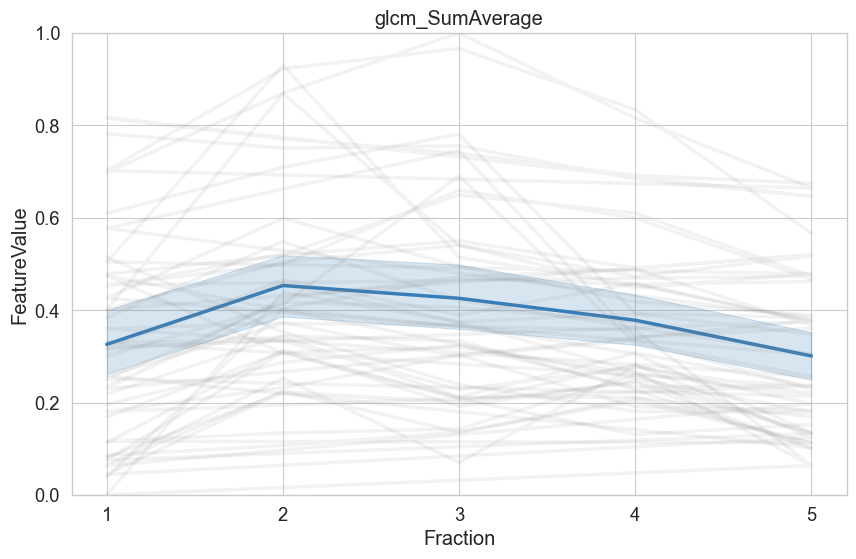

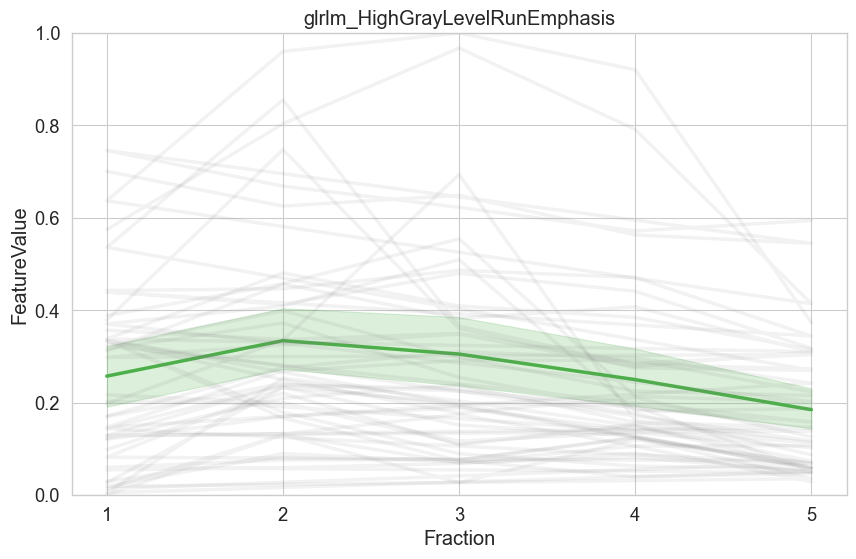

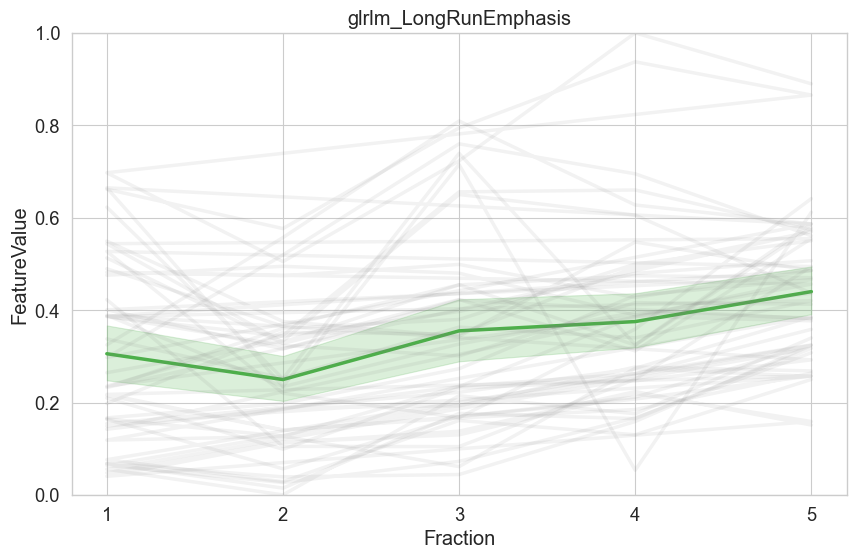

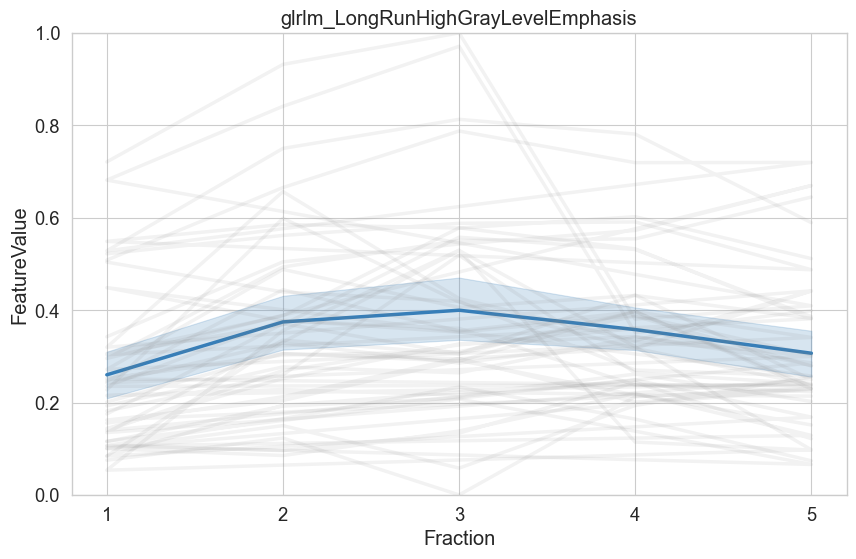

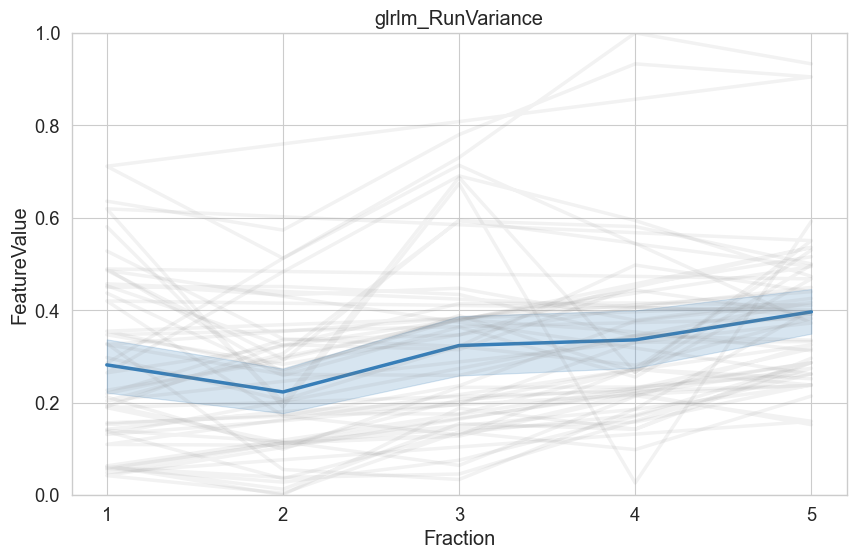

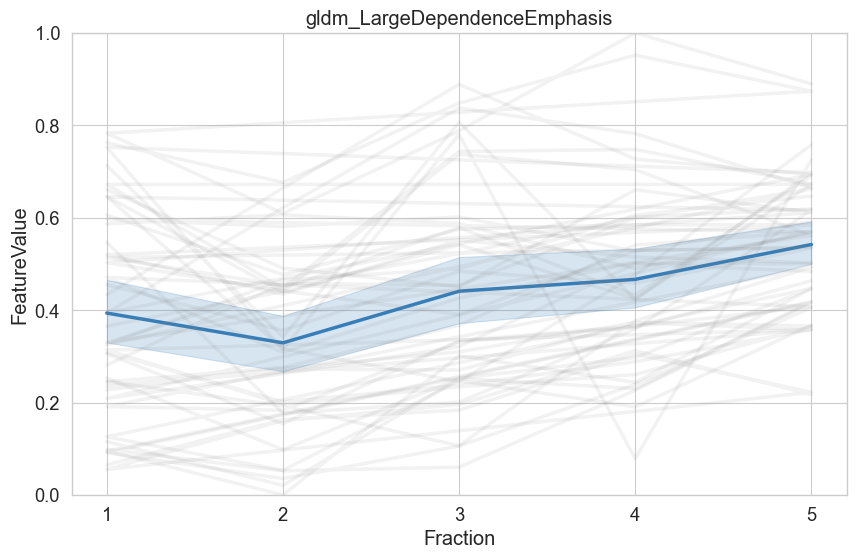

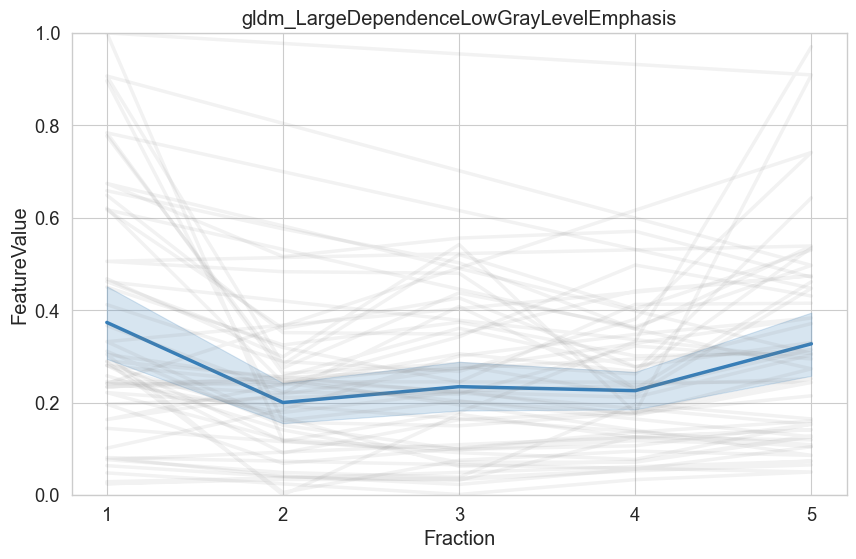

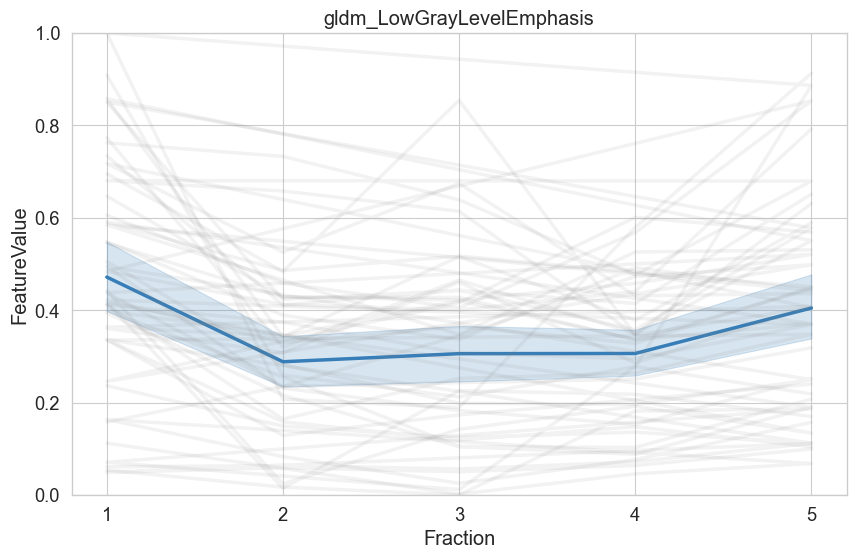

In [3]:
for ft in fts_vals['Feature'].unique():
    df_ft = fts_vals[fts_vals['Feature'] == ft]
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
    line_color = colors[int(sel_label[df_ft['Selected'].values[0]])]
    plt.figure(figsize=(10, 6))
    # plot ci95 as error bars
    sns.lineplot(x='Fraction', y='FeatureValue', data=df_ft, color=line_color, errorbar=('ci', 95))
    for pat in fts_vals['PatID'].unique():
        df_pat = df_ft[df_ft['PatID'] == pat]
        plt.plot(df_pat['Fraction'], df_pat['FeatureValue'], color='grey', alpha=0.1)
    plt.xticks(np.arange(1, 5.1, 1))
    plt.ylim(0, 1)
    plt.title(ft)

    


c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 
The palette list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  func(*plot_args, **plot_kwargs)


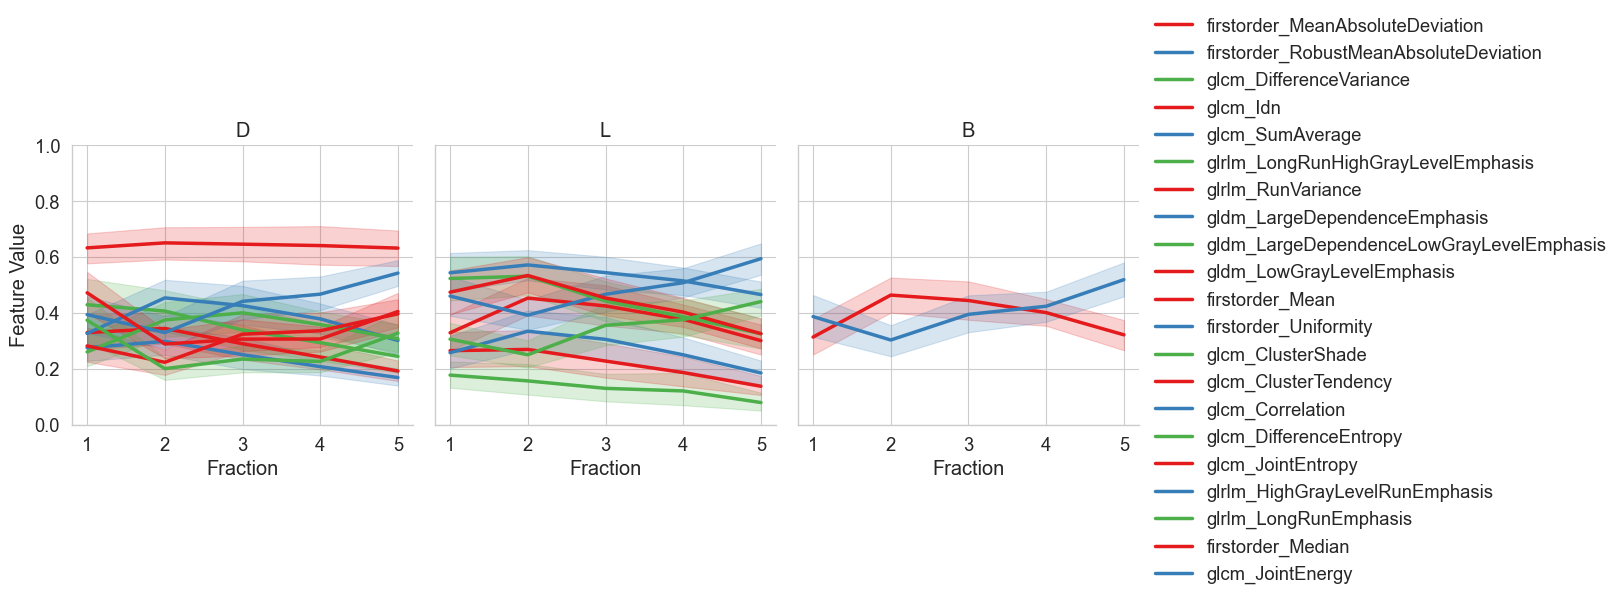

In [9]:
# repeat but do a facet grid
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
g = sns.FacetGrid(fts_vals, col='Selected', col_wrap=3, height=4)
# set color based on selected value
g.map(sns.lineplot, 'Fraction', 'FeatureValue', 'Feature', palette=colors)
g.set_axis_labels('Fraction', 'Feature Value')
g.set_titles('{col_name}')
g.set(ylim=(0, 1))
g.add_legend()
